In [73]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns

In [74]:
data=pd.read_excel('/content/dt.xlsx')

In [75]:
data.info()
len(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


136

In [77]:
data.replace("?", np.nan, inplace=True)
data.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [78]:
data = data.drop(columns=['ind_420', 'ind_422']) 

In [79]:
data=data.dropna()

In [80]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
data.describe().T


count       mean        std  ...        50%        75%         max
ind_5      6167.0  -0.803146  23.624403  ...   0.000000  13.000000   76.000000
ind_6      6167.0  -0.803470  23.624144  ...   0.000000  13.000000   76.000000
ind_8      6167.0  48.388890  36.388526  ...  50.000000  85.714286  100.000000
ind_9      6167.0  48.289282  36.478009  ...  50.000000  85.714286  100.000000
ind_10     6167.0   0.099609  60.414625  ...   0.000000  57.142857  100.000000
...           ...        ...        ...  ...        ...        ...         ...
ind_426    6167.0   0.498188   0.228547  ...   0.495192   0.675730    1.000000
ind_428    6167.0   0.490174   0.150483  ...   0.487078   0.601508    0.868534
20_target  6167.0  -0.057102  14.834497  ...   0.000000  15.385945   15.768767
50_target  6167.0  -2.906358  34.559778  ... -34.267756  35.879524   37.038694
90_target  6167.0  -3.315072  36.841541  ... -35.788391  37.521892   38.465649

[133 rows x 8 columns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 134 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(1)
memory usage: 6.4+ MB


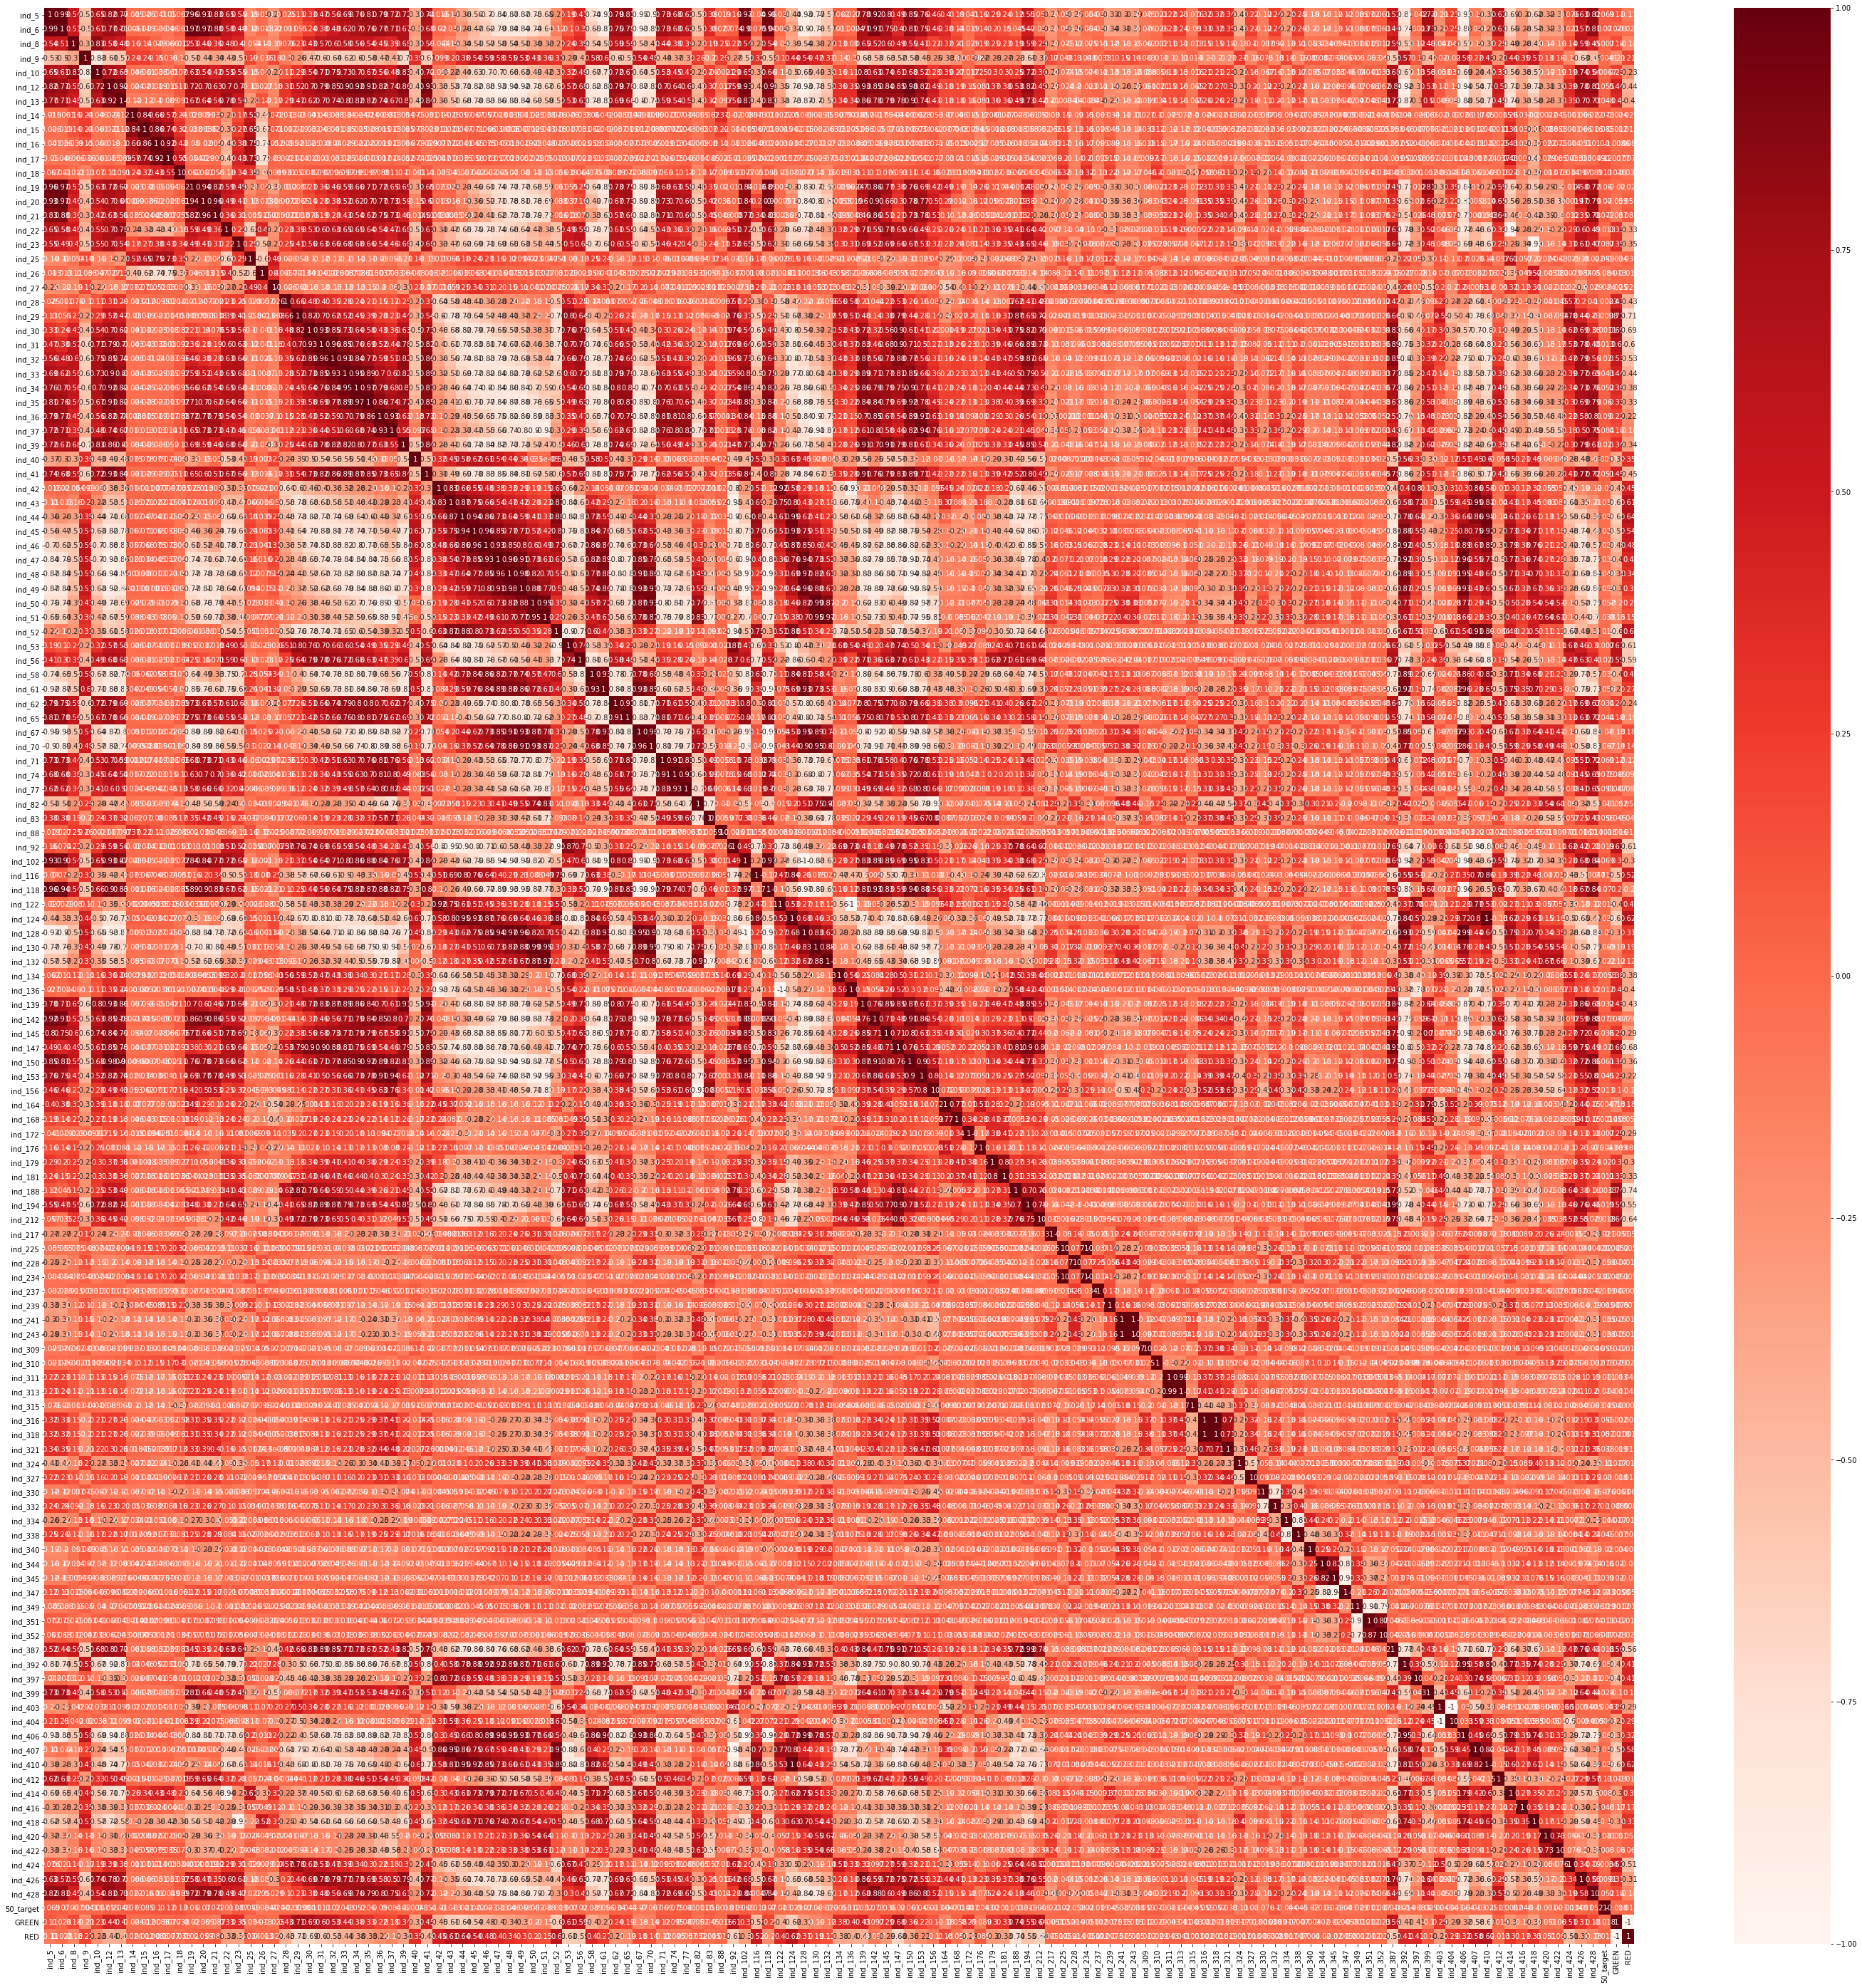

In [82]:
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [83]:
#Correlation with output variable
cor_target = abs(cor["50_target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features


ind_16       0.101774
ind_17       0.121097
ind_18       0.127057
ind_324      0.110802
ind_332      0.104057
ind_412      0.127234
ind_418      0.101488
50_target    1.000000
Name: 50_target, dtype: float64

In [84]:
relevant_features2 = cor_target[cor_target<-0.1]
relevant_features2

Series([], Name: 50_target, dtype: float64)

# REGRESSION

In [85]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm 
import seaborn as sns

In [86]:
#I choose 50_target as my response. 
from sklearn.preprocessing import LabelEncoder
df=data.copy()
df = df.drop(columns=['20_target', '90_target'])    
dummy = pd.get_dummies(data["ind_109"])
df_dummy = pd.concat([df, dummy],axis=1)
df_dummy = df_dummy.drop(["ind_109"], axis=1)
df_dummy.head()
df = df_dummy

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6917871236801147, 0.0)

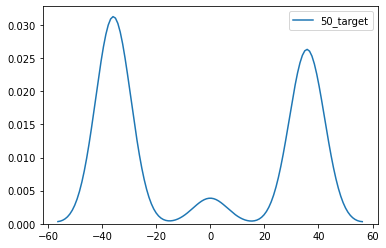

In [87]:
sns.kdeplot(data["50_target"]) #has tree peaks,
stats.shapiro(data["50_target"]) #it is not normally distributed

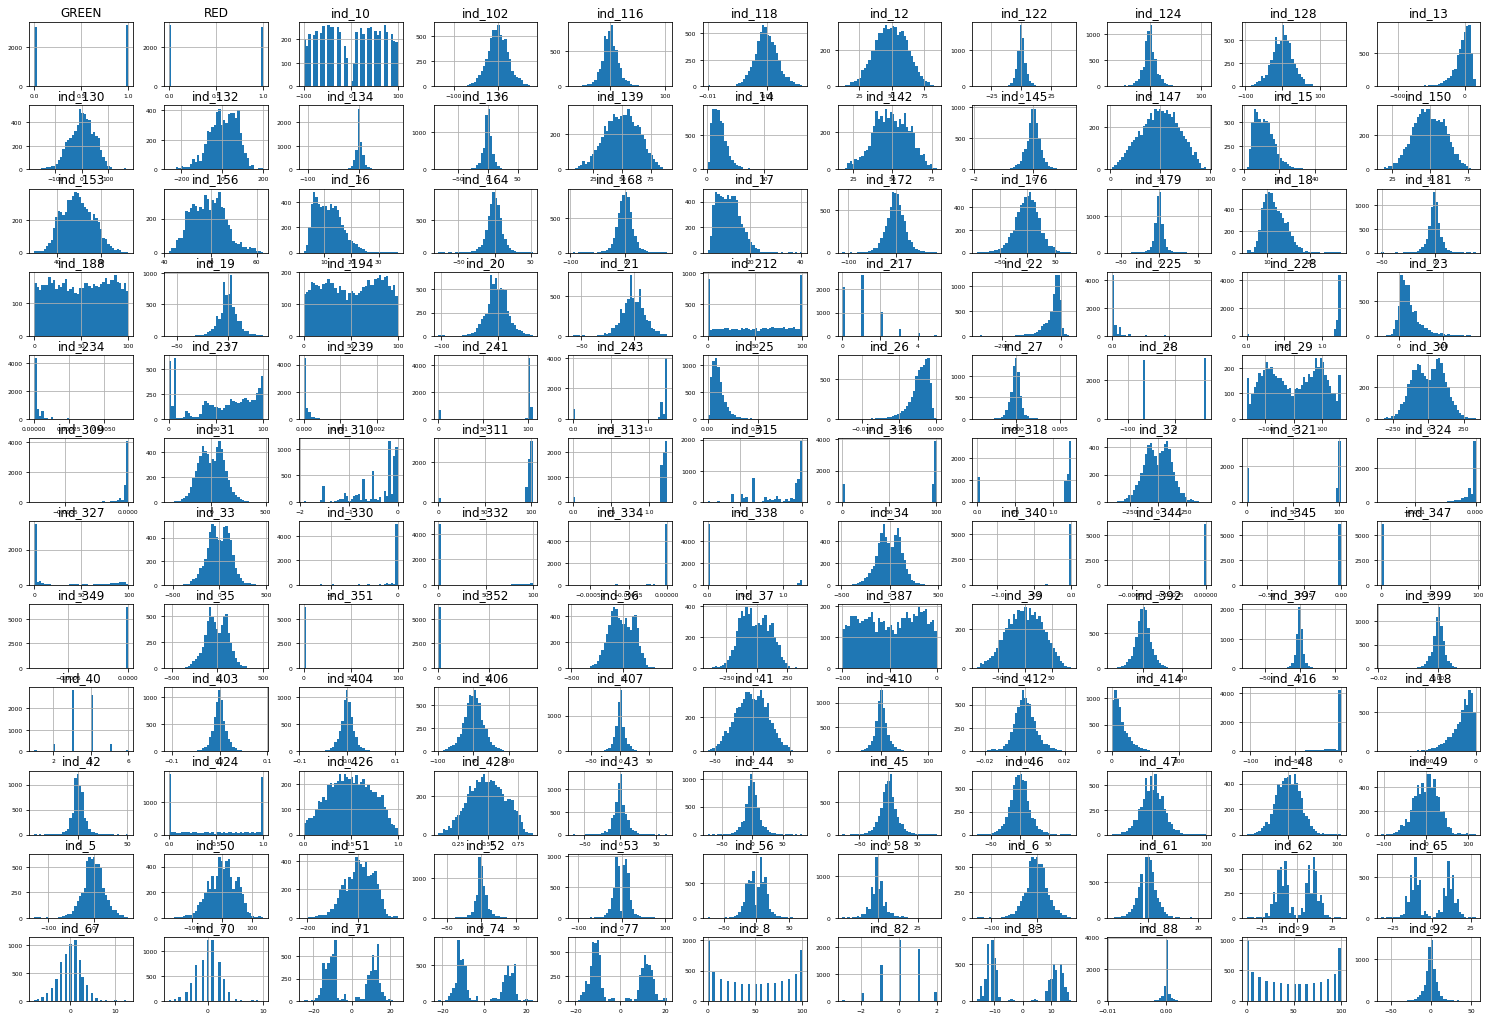

In [88]:

data_df = df.drop(["50_target"], axis=1)
data_df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

In [89]:
#Loading the dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("50_target",1)
X=sm.add_constant(X)    #Feature Matrix
y = df["50_target"]          #Target Variable
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42)


In [44]:
X_train.shape, y_train.shape, X_test.shape, X_test.shape

((4625, 134), (4625,), (1542, 134), (1542, 134))

In [90]:
import statsmodels.api as sm
lm = sm.OLS(y_train, np.asarray(X_train))
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     7.761
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.87e-120
Time:                        20:10:36   Log-Likelihood:                -22477.
No. Observations:                4625   AIC:                         4.522e+04
Df Residuals:                    4493   BIC:                         4.607e+04
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2300      0.868      1.418      0.156      -0.471       2.931
x2             0.3859      0.708      0.545      0.586      -1.001       1.773
x3         -3.665e+08   1.35e+08     -2.721      0.007   -6.31e+08   -1.02e+08
x4          3.665e+08   1.35e+08      2.721      0.007    1.02e+08    6.31e+08
x5          3.665e+08   1.35e+08      2.721      0.007    1.02e+08    6.31e+08
x6             1.7607      2.076      0.848      0.396      -2.309       5.831
x7             0.0054      0.025      0.214      0.831      -0.044       0.055
x8             0.0876      0.176      0.497      0.619      -0.258       0.433
x9            -0.2447      0.252     -0.973      0.331      -0.738       0.248
x10            0.0084      0.373      0.023      0.982      -0.723       0.740
x11            0.6415      0.393      1.634      0.102      -0.128       1.411
x12            1.5128      0.284      5.318      0.000       0.955       2.070
x13            1.8892      1.334      1.416      0.157      -0.726       4.504
x14           -1.0356      1.076     -0.963      0.336      -3.144       1.073
x15            1.0597      1.270      0.834      0.404      -1.430       3.549
x16           -0.2451      0.329     -0.746      0.456      -0.889       0.399
x17           -0.2209      0.331     -0.667      0.505      -0.870       0.429
x18         1.726e+05   1.02e+06      0.169      0.866   -1.83e+06    2.17e+06
x19         1.729e+05   1.02e+06      0.169      0.865   -1.83e+06    2.17e+06
x20        -3.498e+05   2.04e+06     -0.171      0.864   -4.35e+06    3.65e+06
x21           -0.0108      0.012     -0.917      0.359      -0.034       0.012
x22           -0.0178      0.018     -0.973      0.330      -0.054       0.018
x23           -0.0192      0.021     -0.913      0.361      -0.061       0.022
x24            0.0492      0.029      1.705      0.088      -0.007       0.106
x25           -0.0564      0.027     -2.070      0.038      -0.110      -0.003
x26            0.0604      0.025      2.388      0.017       0.011       0.110
x27           -0.0372      0.028     -1.311      0.190      -0.093       0.018
x28           -0.0276      0.023     -1.177      0.239      -0.073       0.018
x29           -0.0031      0.017     -0.180      0.857      -0.037       0.031
x30            0.0901      0.018      5.115      0.000       0.056       0.125
x31           -0.0600      0.084     -0.718      0.473      -0.224       0.104
x32           -1.2932      1.289     -1.003      0.316      -3.820       1.233
x33            0.0898      0.076      1.174      0.241      -0.060       0.240
x34            0.4612      0.392      1.177      0.239      -0.307       1.229
x35            0.4997      0.253      1.976      0.048       0.004       0.996
x36           -0.1140      0.263     -0.434      0.665      -0.629       0.401
x3

In [101]:
X2 = df(columns=["ind_16","ind_17","ind_18","ind_324","ind_332","ind_412","ind_418"])
X2=sm.add_constant(X2)    #Feature Matrix
y2 = df["50_target"]          #Target Variable
X2_train, X2_test , y2_train , y2_test = train_test_split(X2, y2, test_size = 0.25 , random_state = 42)

TypeError: ignored

In [91]:
influence = model.get_influence()
influence

In [94]:
resid_student = influence.resid_studentized_external

Leverage vs studentized residuals


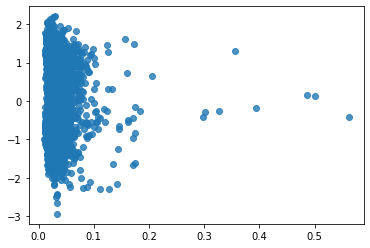

In [96]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)
